## Импортирование списка в  df

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from typing import List
from sqlalchemy import create_engine

### Создание сводной таблицы 

In [2]:
from sqlalchemy import create_engine
import pandas as pd

# создаём движок SQLAlchemy для SQLite
engine = create_engine('sqlite:///wallet.db')

# читаем таблицы
df_E = pd.read_sql_table("Expenses", con=engine)
df_I = pd.read_sql_table("Income", con=engine)

# переименовываем колонки
df_E.columns = ["date", "category", "account", "amount", "tag", "comment"]
df_I.columns = ["date", "category", "account", "amount", "tag", "comment"]

# приводим date к datetime
df_I["date"] = pd.to_datetime(df_I["date"])

# фильтруем по нужным категориям
filtered = df_I[(df_I["category"] == "Прибыль с продажи") | (df_I["category"] == "Работа")]

# создаём столбец с годом и месяцем
filtered["month"] = filtered["date"].dt.to_period("M")  # например, '2024-03'

# группируем по категории и месяцу
summary_by_month = filtered.groupby(["month", "category"])["amount"].sum().reset_index()
Total_values = filtered.groupby(["month"])["amount"].sum().reset_index()
print(Total_values)



     month  amount
0  2025-01  1025.0
1  2025-02  1215.0
2  2025-03  1200.0
3  2025-04  1025.0


/var/folders/yb/8mx45ms97n71sv4m3hkn8_7h0000gn/T/ipykernel_43925/1886577200.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["month"] = filtered["date"].dt.to_period("M")  # например, '2024-03'


## График по сводной таблице

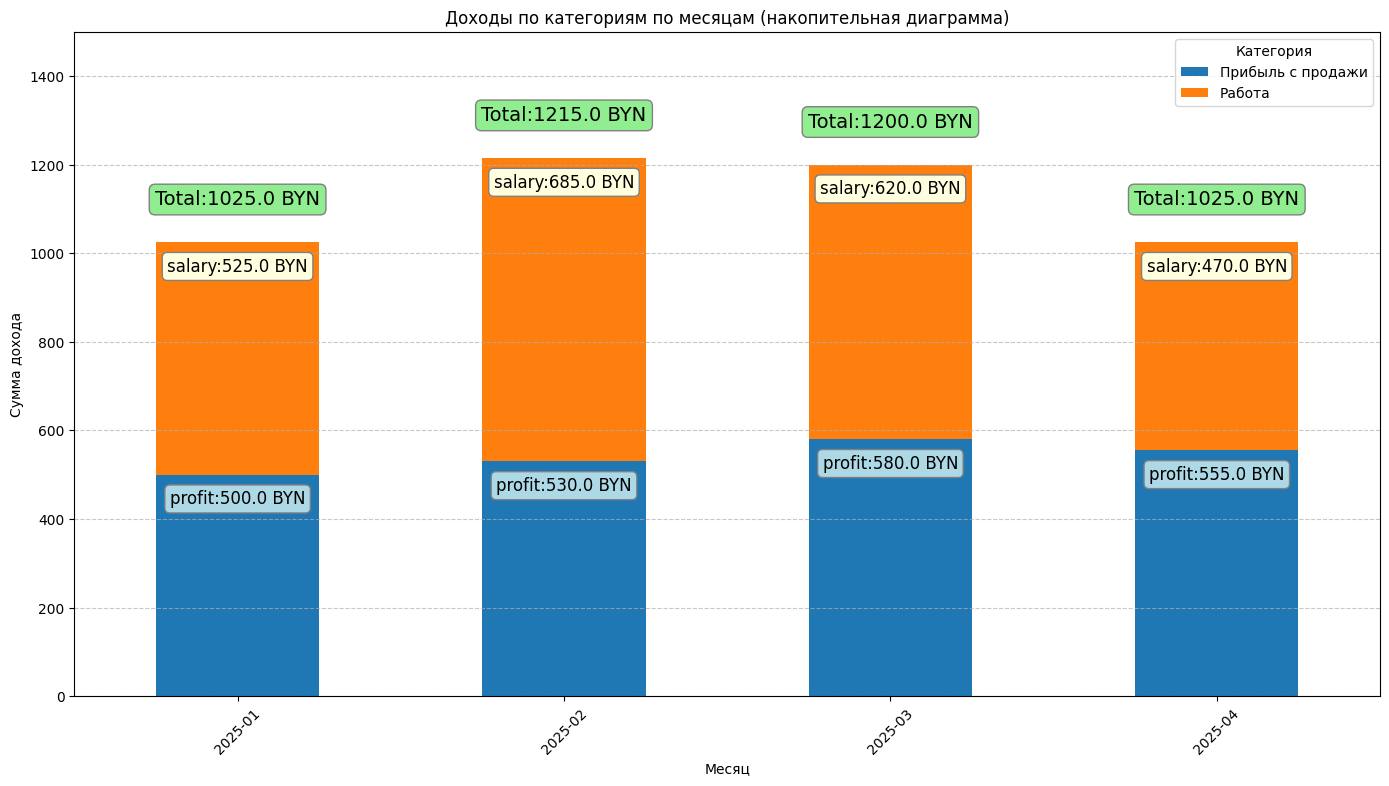

In [3]:

# Преобразуем данные: pivot таблицу
pivot_df = summary_by_month.pivot(index="month", columns="category", values="amount").fillna(0)
Text_values = pivot_df.reset_index()
# Строим stacked bar chart
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(14, 8))

for index, row in Text_values.iterrows():
    profit = row["Прибыль с продажи"]
    salary = row["Работа"]
    Total = profit + salary
    ax.text(x = index , y = Total + 75, s = f"Total:{Total} BYN",  ha='center', va='bottom',
        fontsize=14,  # размер шрифта
        bbox=dict(
        facecolor='lightgreen',   # цвет заливки
        edgecolor='gray',          # цвет рамки
        boxstyle='round,pad=0.3',  # стиль рамки
        linewidth=1                # толщина линии
    ))
    ax.text(x = index , y = Total - 75 , s = f"salary:{salary} BYN",  ha='center', va='bottom', fontsize=12,
        bbox=dict(
        facecolor='lightyellow',   # цвет заливки
        edgecolor='gray',          # цвет рамки
        boxstyle='round,pad=0.3',  # стиль рамки
        linewidth=1                # толщина линии
    ))
    ax.text(x = index , y = profit - 75, s = f"profit:{profit} BYN",  ha='center', va='bottom', fontsize=12,
        bbox=dict(
        facecolor='lightblue',   # цвет заливки
        edgecolor='gray',          # цвет рамки
        boxstyle='round,pad=0.3',  # стиль рамки
        linewidth=1                # толщина линии
    ))

# for index, row in Text_values.iterrows():
#     month = row["month"]
#     profit = row["Прибыль с продажи"]
#     work = row["Работа"]
#     print(f"Месяц: {month}, Прибыль: {profit}, Работа: {work}")

plt.title("Доходы по категориям по месяцам (накопительная диаграмма)")
plt.xlabel("Месяц")
plt.ylabel("Сумма дохода")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Категория")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1500)
plt.savefig("доходы_по_категориям_столбцы.png")
plt.show()



/var/folders/yb/8mx45ms97n71sv4m3hkn8_7h0000gn/T/ipykernel_43925/3629813336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_categories["month"] = filtered_categories["date"].dt.to_period("M")


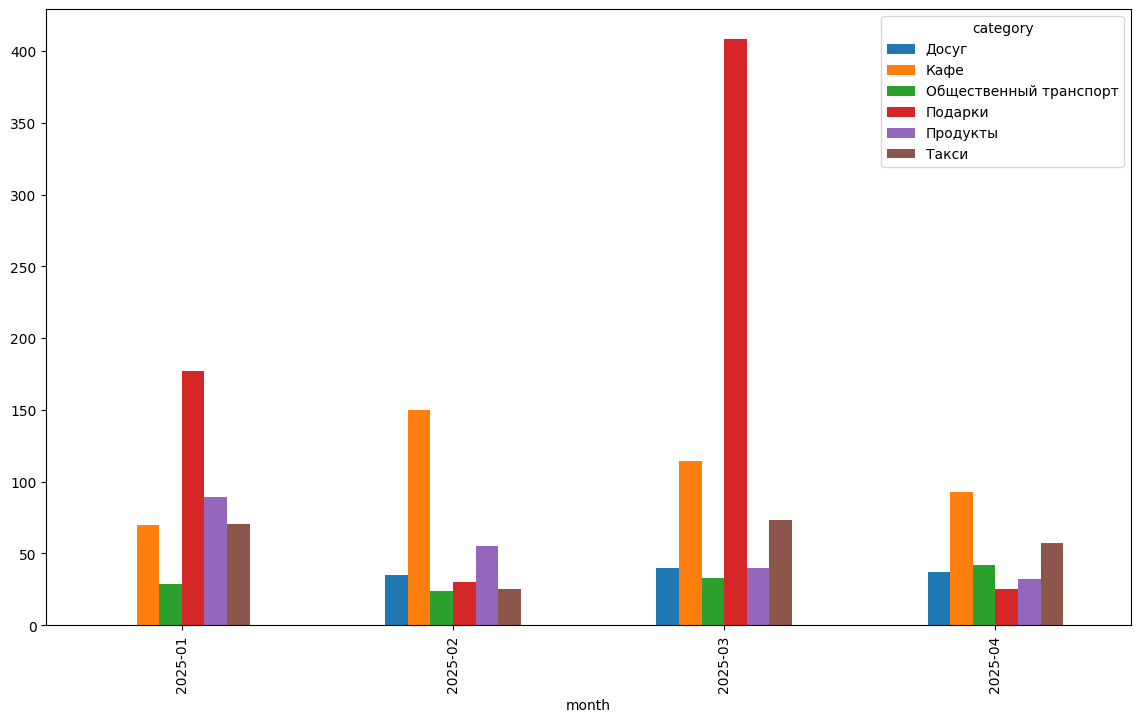

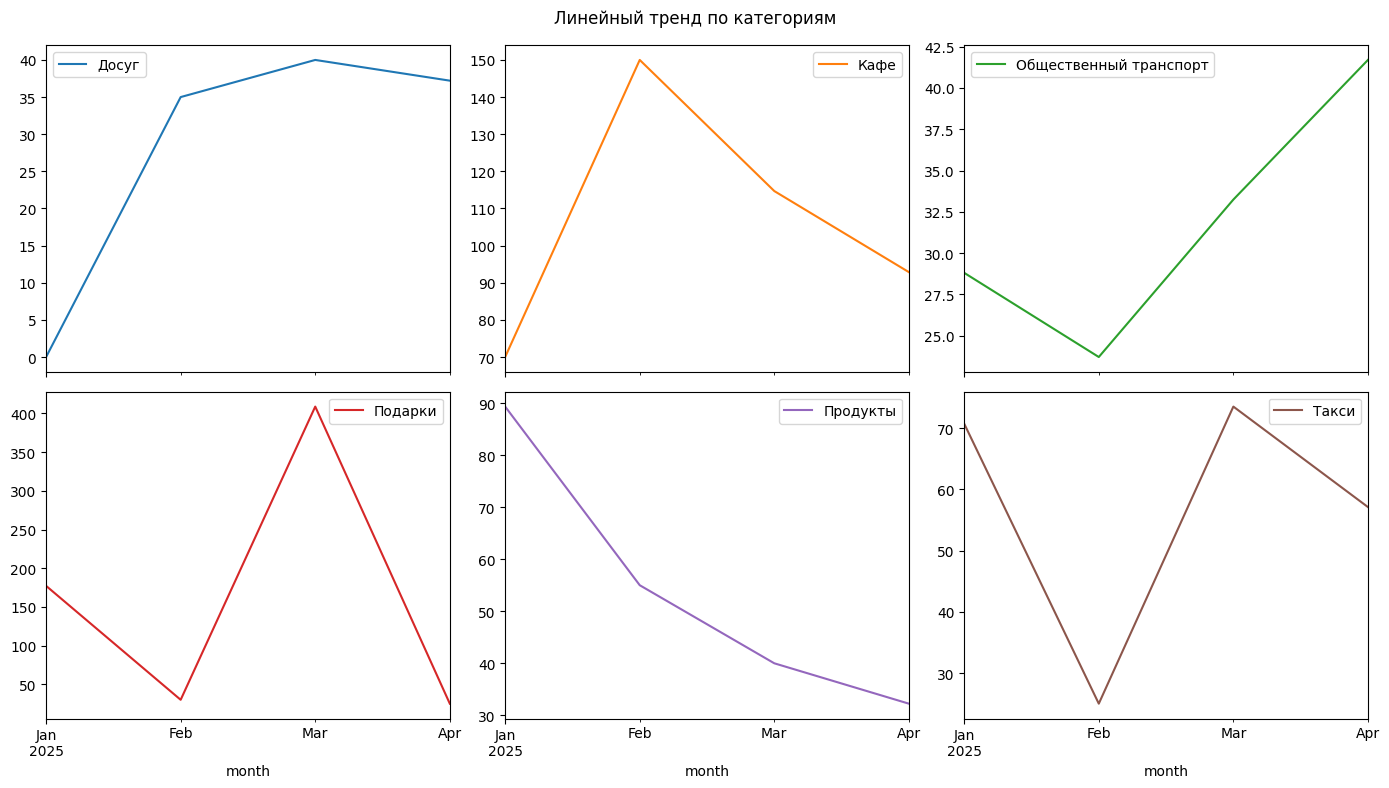

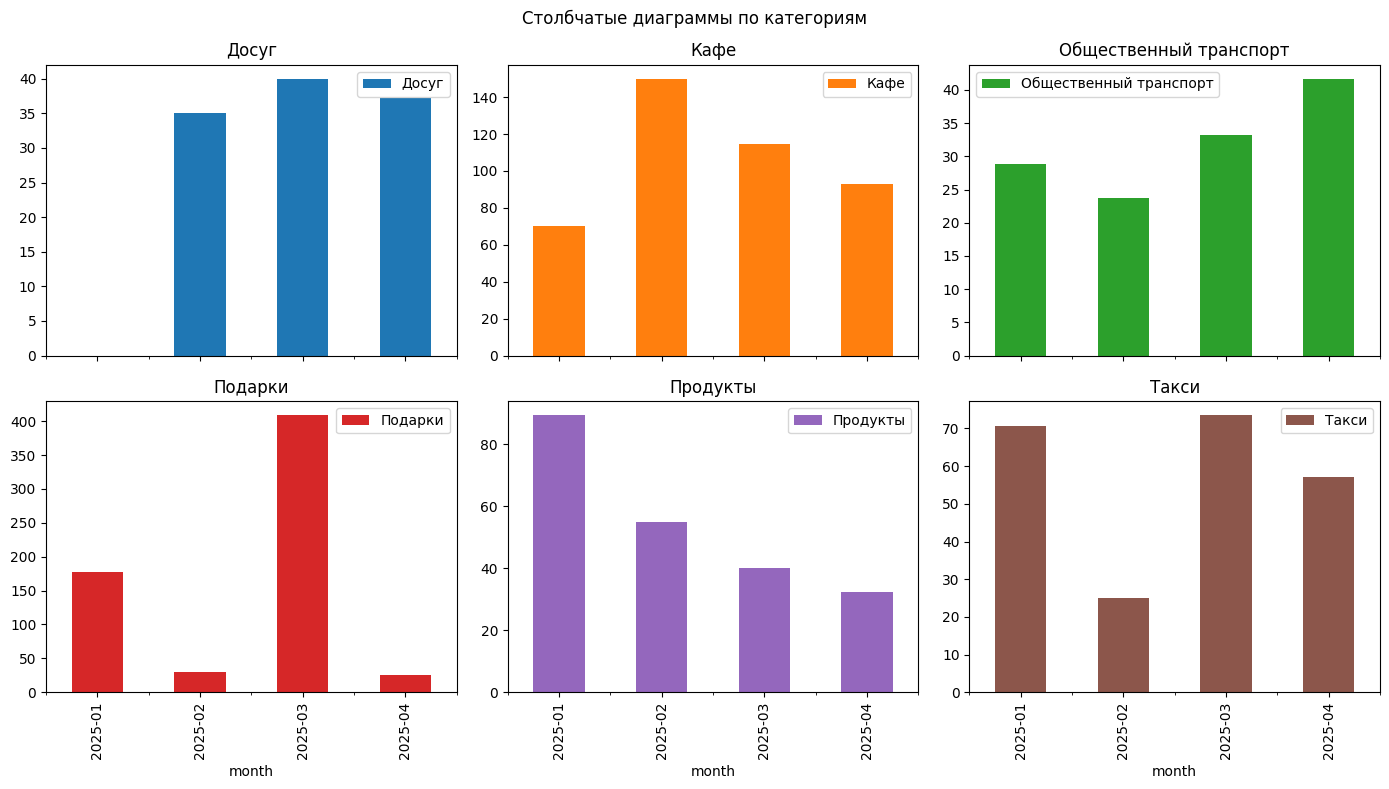

In [4]:
df_E["date"] = pd.to_datetime(df_E["date"])

filtered_categories = df_E[df_E["category"].isin(["Кафе", "Такси", "Продукты", "Подарки", "Досуг", "Общественный транспорт"])]

filtered_categories["month"] = filtered_categories["date"].dt.to_period("M")

filtered_categories = filtered_categories.groupby(["month", "category"])["amount"].sum().reset_index()

pivot_df_expenses = filtered_categories.pivot(index = "month", columns = "category", values = "amount").fillna(0)
pivot_df_expenses.plot(kind="bar", figsize=(14,8))
plt.savefig("расходы_по_категориям_мес.png")
plt.show()

# pivot_df_expenses.plot(kind="line", figsize=(14,8), subplots=(2,1,2))
pivot_df_expenses.plot(kind="line", figsize=(14, 8), subplots=True, layout=(2, 3), sharex=True)
plt.suptitle("Линейный тренд по категориям")
plt.tight_layout()
plt.savefig("расходы_по_категориям_линейный.png")
plt.show()


pivot_df_expenses.plot(kind="bar", figsize=(14, 8), subplots=True, layout=(2, 3), sharex=True)
plt.suptitle("Столбчатые диаграммы по категориям")
plt.tight_layout()
plt.savefig("расходы_по_категориям_столбцы.png")
plt.show()
